In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("full.csv")

In [4]:
df.head()

,track,track_id,artist,album,sp_release_date,duration,explicit,danceability,energy,key,...,liveness,valence,tempo,time_signature,playcount,video_id,view,channelTitle,yt_release_date,title
0,Shape of You,0FE9t6xYkqWXU2ahLh6D8X,Ed Sheeran,Shape of You,2017-01-06,03:54,False,0.825,0.652,1,...,0.0931,0.931,95.977,4,2971854102,JGwWNGJdvx8,5533840092,Ed Sheeran,2017-01-30T10:57:50Z,Ed Sheeran - Shape of You (Official Music Video)
1,Blinding Lights,0sf12qNH5qcw8qpgymFOqD,The Weeknd,Blinding Lights,2019-11-29,03:22,False,0.513,0.796,1,...,0.0938,0.345,171.017,4,2636804603,fHI8X4OXluQ,611764719,TheWeekndVEVO,2019-11-29T05:00:08Z,The Weeknd - Blinding Lights (Official Audio)
2,Dance Monkey,5ZULALImTm80tzUbYQYM9d,Tones And I,The Kids Are Coming,2019-08-29,03:29,False,0.824,0.588,6,...,0.1490,0.513,98.027,4,2407586466,q0hyYWKXF0Q,1732473790,Tones And I,2019-06-24T22:01:36Z,TONES AND I - DANCE MONKEY (OFFICIAL VIDEO)
3,rockstar,7wGoVu4Dady5GV0Sv4UIsx,Post Malone,rockstar,2017-09-15,03:38,True,0.577,0.522,5,...,0.1420,0.119,159.772,4,2299920941,UceaB4D0jpo,930777018,PostMaloneVEVO,2017-11-22T05:00:01Z,Post Malone - rockstar ft. 21 Savage
4,One Dance,1xznGGDReH1oQq0xzbwXa3,Drake,Views,2016-05-06,02:54,False,0.791,0.619,1,...,0.3510,0.371,103.989,4,2169189786,iAbnEUA0wpA,125034981,Chris Obando,2018-10-30T17:26:40Z,One Dance-Drake (feat. Wizkid &amp; Kyla)


In [5]:
df.columns

Index(['track', 'track_id', 'artist', 'album', 'sp_release_date', 'duration',
       'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature', 'playcount', 'video_id', 'view', 'channelTitle',
       'yt_release_date', 'title'],
      dtype='object')

In [6]:
pearson_view = {}
pearson_playcount = {}
spearman_view = {}
spearman_playcount = {}
feature = ['danceability', 'energy', 'loudness',
       'speechiness', 'instrumentalness', 'liveness', 'valence', 'tempo']

for col in feature:
	pearson_playcount[col] = df['playcount'].corr(df[col], method='pearson')
	pearson_view[col] = df['view'].corr(df[col], method='pearson')
	spearman_view[col] = df['view'].corr(df[col], method='spearman')
	spearman_playcount[col] = df['playcount'].corr(df[col], method='spearman')

corr = pd.DataFrame(columns=feature)
corr = corr.append(pearson_playcount, ignore_index=True)
corr = corr.append(pearson_view, ignore_index=True)
corr = corr.append(spearman_playcount, ignore_index=True)
corr = corr.append(spearman_view, ignore_index=True)
corr['type'] = ['pearson_playcount', 'pearson_view', 'spearman_playcount', 'spearman_view']
corr = corr.set_index("type")
corr.head()


,danceability,energy,loudness,speechiness,instrumentalness,liveness,valence,tempo
type,,,,,,,,
pearson_playcount,0.068073,-0.048913,0.035358,-0.017690,-0.057566,-0.037826,0.002875,-0.035693
pearson_view,0.096071,0.084030,0.155144,-0.011438,-0.057533,-0.011889,0.086404,-0.008357
spearman_playcount,0.063136,-0.042373,0.023765,0.002649,-0.082468,-0.037102,0.032095,-0.031510
spearman_view,0.111380,0.144883,0.229751,0.057169,-0.095603,-0.007125,0.092280,0.015850


<AxesSubplot:ylabel='type'>

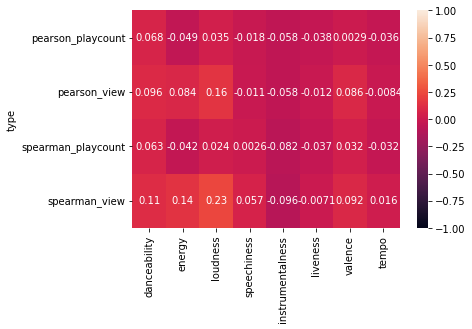

In [7]:
sns.heatmap(corr, vmin=-1, vmax=1, annot=True)

/home/viet/anaconda3/envs/eda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/viet/anaconda3/envs/eda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/viet/anaconda3/envs/eda/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

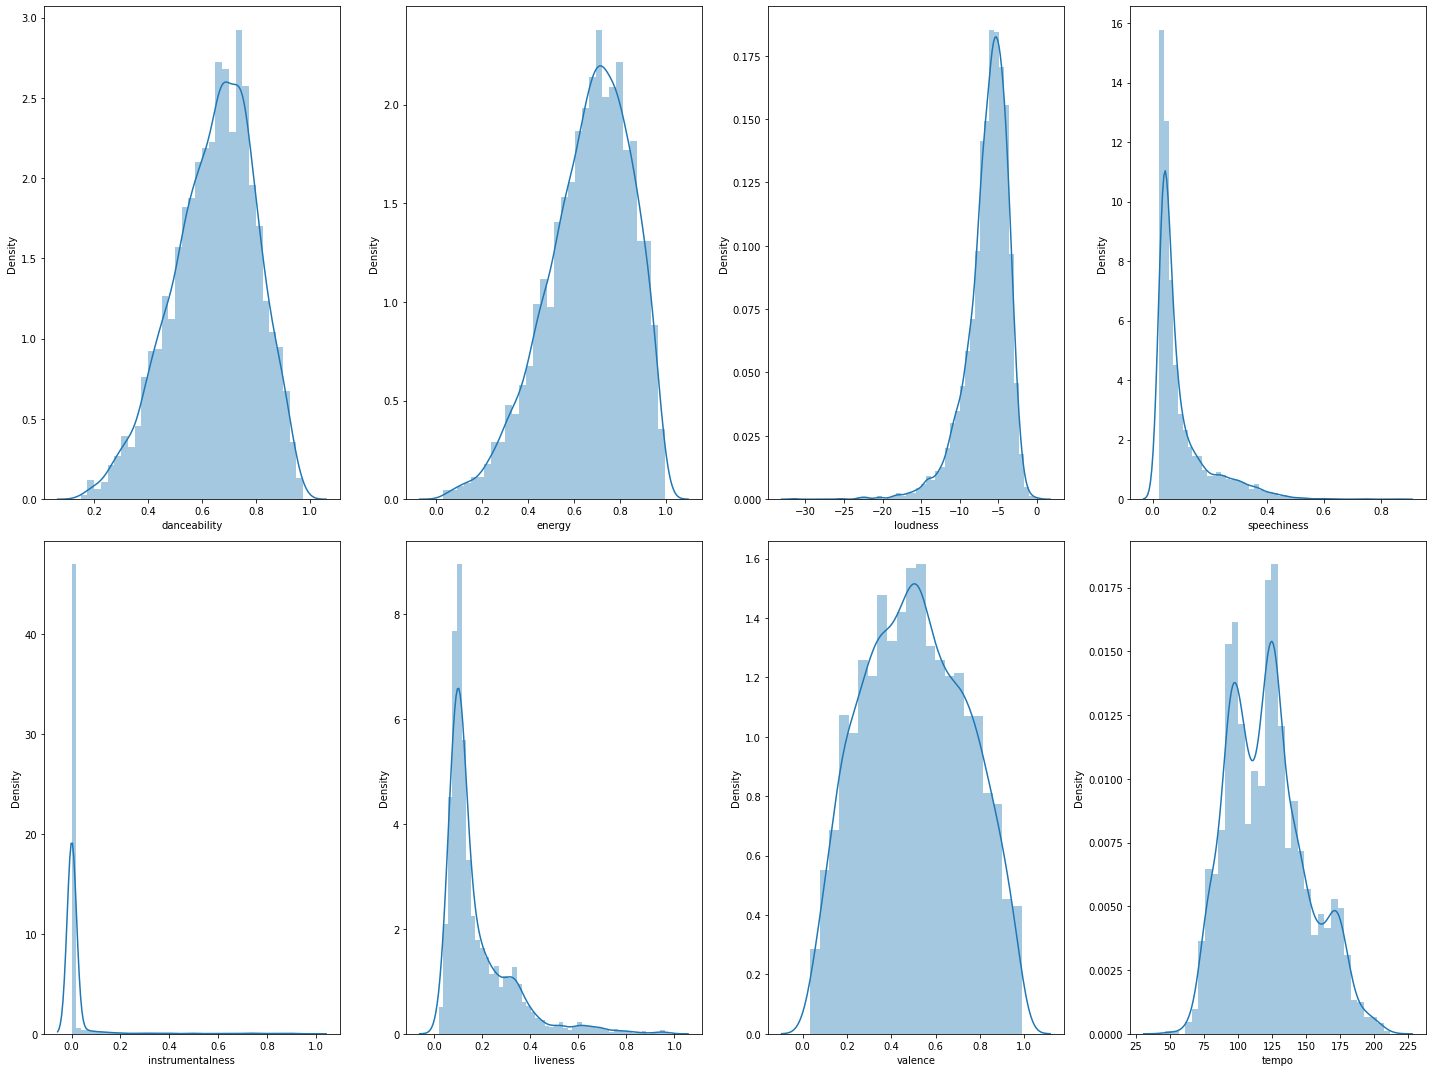

In [8]:
fig, ax = plt.subplots(2, 4, figsize=(20, 15))
for i in range(len(feature)):
	if i < 4:
		row = 0
	else:
		row = 1
	col = i % 4
	sns.distplot(df[feature[i]], ax=ax[row, col])
fig.tight_layout()

In [9]:
df['playcount'].corr(df['view'], method='pearson')

0.5859106689136782

<AxesSubplot:xlabel='playcount', ylabel='view'>

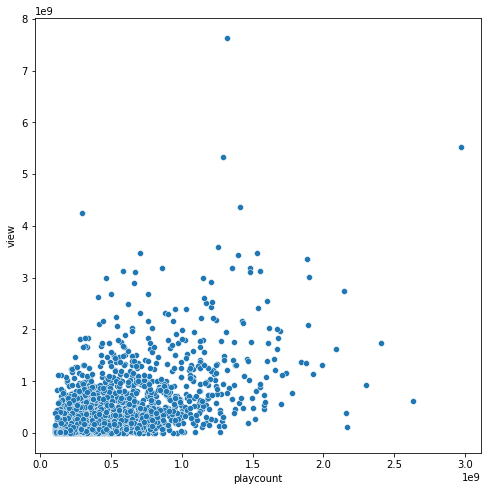

In [10]:
f, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(data=df, x="playcount", y="view", hue=None, ax=ax)
# sns.scatterplot(data=df, x="playcount", y="view", hue=None, ax=axs[1])
# plt.show()
# plt.scatter(df['playcount'], df['view'])
# plt.xlabel('playcount')
# plt.ylabel('view')
# plt.show()

In [26]:
df['time_signature'].unique()

array([4, 3, 5, 1])

In [41]:
df.groupby('time_signature')['track_id'].count()

time_signature
1      10
3     151
4    4250
5      49
Name: track_id, dtype: int64

In [42]:
df[df['time_signature'] == 1]

,track,track_id,artist,album,sp_release_date,duration,explicit,danceability,energy,key,...,liveness,valence,tempo,time_signature,playcount,video_id,view,channelTitle,yt_release_date,title
502,Come & Get It,5U2m76qAMdr3gXI0g6ptlG,Selena Gomez,Stars Dance,2013-01-01,03:52,False,0.349,0.7950,7,...,0.0812,0.5420,148.985,1,282374724,n-D1EB74Ckg,727285536,SelenaGomezVEVO,2013-05-07T23:53:06Z,Selena Gomez - Come &amp; Get It
638,Mess Is Mine,7BVwi9cIzSc6tpyxsp47vJ,Vance Joy,Dream Your Life Away,2014-09-08,03:44,False,0.595,0.7230,7,...,0.0995,0.2720,108.043,1,363715766,1C816p-KTNk,37425271,Vance Joy,2014-07-10T06:11:29Z,Vance Joy - &quot;Mess is Mine&quot; [Official...
1345,Money - 2011 Remastered Version,7Gx2q0ueNwvDp2BOZYGCMO,Pink Floyd,The Dark Side Of The Moon (2011 Remastered Ver...,1973-03-01,06:34,False,0.461,0.4280,11,...,0.1670,0.7840,125.990,1,323608261,-0kcet4aPpQ,24787219,Pink Floyd,2014-06-25T15:14:35Z,Pink Floyd - Money (Official Music Video)
2027,Nuvole Bianche,3weNRklVDqb4Rr5MhKBR3D,Ludovico Einaudi,Una Mattina,2004-01-01,05:58,False,0.191,0.0582,8,...,0.0941,0.0454,132.614,1,254692341,4VR-6AS0-l4,71063959,Rousseau,2018-08-20T13:00:00Z,Ludovico Einaudi - Nuvole Bianche
2357,Takeaway (feat. Lennon Stella),6wo37KVqFJhtuxPTpLCcfe,The Chainsmokers,World War Joy...Takeaway,2019-07-24,03:30,False,0.294,0.5050,3,...,0.0977,0.3570,85.332,1,477099480,lzkKzZmRZk8,126146174,ChainsmokersVEVO,2019-07-24T15:58:45Z,"The Chainsmokers, ILLENIUM - Takeaway (Officia..."
2399,hot girl bummer,7aiClxsDWFRQ0Kzk5KI5ku,blackbear,hot girl bummer,2019-08-23,03:5,True,0.778,0.5590,6,...,0.3990,0.6780,129.989,1,911619078,k-T4Odb-r5c,51876251,Mr Shades,2019-08-23T04:02:03Z,​blackbear - hot girl bummer (Lyrics)
2492,Have Yourself A Merry Little Christmas,1Qi2wh8fFgDV7tl4Sj3f2K,Sam Smith,Have Yourself A Merry Little Christmas,2014-12-05,02:51,False,0.438,0.1780,5,...,0.3160,0.3440,75.248,1,450820285,rnEqv8WcVq8,26289134,SamSmithVEVO,2014-12-06T02:00:01Z,Sam Smith - Have Yourself A Merry Little Chris...
2700,Come Through and Chill (feat. J. Cole & Salaam...,1m8WpLYXEiNVZchsWEcCSy,Miguel,War & Leisure,2017-12-01,05:22,True,0.461,0.6530,6,...,0.1970,0.5880,81.628,1,174434531,u_C4onVrr8U,52914101,MiguelVEVO,2018-04-25T16:00:11Z,Miguel - Come Through and Chill (Official Vide...
2951,Love Yourz,4gkl7QbQvBd3TM9PhlWFkI,J. Cole,2014 Forest Hills Drive,2014-12-09,03:32,True,0.502,0.6230,8,...,0.1190,0.3990,75.578,1,209436457,Ka4BxFizU7I,25937451,JColeVEVO,2016-01-29T05:40:55Z,J. Cole - Love Yourz (Official Music Video)
3961,F.N,0RLLvYBopDwooCyvnTwgYu,Lil Tjay,True 2 Myself,2019-10-11,03:44,True,0.567,0.5150,6,...,0.0780,0.3210,120.100,1,449670024,R9RtTGzs5EE,234368899,liltjayVEVO,2019-08-22T20:00:11Z,Lil Tjay - F.N (Official Video)


In [27]:
df['explicit'].unique()

array([False,  True])

In [32]:
sorted(df['key'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [33]:
df['mode'].unique()

array([0, 1])

explicit
False    3172
True     1288
Name: track_id, dtype: int64


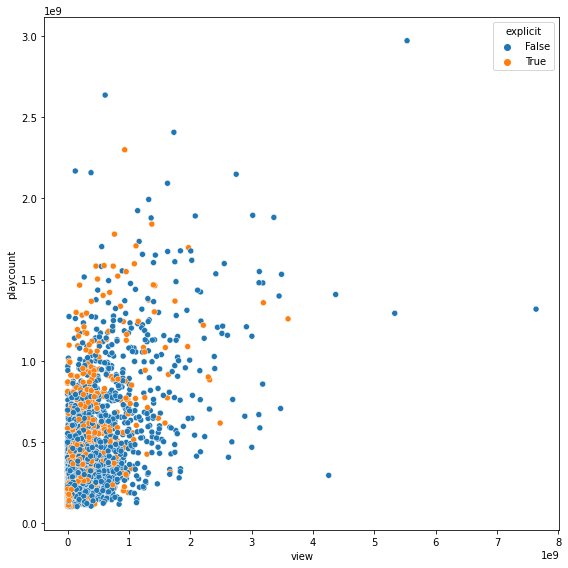

In [40]:
print(df.groupby('explicit')['track_id'].count())
f, ax = plt.subplots(figsize=(8, 8))
sns.scatterplot(data=df, x="view", y="playcount", hue='explicit', ax=ax)
f.tight_layout()

In [11]:
len(df[df["playcount"] < 500000000])

3591

In [12]:
len(df[df["view"] < 500000000])

3832

In [13]:
best = df[df['playcount'] > 500000000]
best = best[best['view'] > 500000000]

In [14]:
worst = pd.concat([best, df]).drop_duplicates(keep=False)

In [15]:
worst.describe

<bound method NDFrame.describe of                                             track                track_id  \
4                                       One Dance  1xznGGDReH1oQq0xzbwXa3   
10                              Someone You Loved  2TIlqbIneP0ZY1O0EzYLlc   
27                                  XO TOUR Llif3  2eMwDehkIC1j68U6FA3Eiq   
34                                     Better Now  7dt6x5M1jzdTEt8oCbisTK   
74    Light It Up (feat. Nyla & Fuse ODG) - Remix  6lDo13SSgTv0WbyUQKgnjk   
...                                           ...                     ...   
4455                                   Easy On Me  0gplL1WMoJ6iYaPgMCL0gX   
4456                              Wrong Direction  5Qsp8mtshe70DX7EYbWZGo   
4457                                 I Love You's  60todhJq1ScRkVxFvXTuZF   
4458                                Girls Like Us  5SFXOMJJ334Wn2PwBHeRZN   
4459      m y . l i f e (with 21 Savage & Morray)  1D3z6HTiQsNmZxjl7F7eoG   

                artist                   

In [16]:
df["sp_release_date"].head()

0    2017-01-06
1    2019-11-29
2    2019-08-29
3    2017-09-15
4    2016-05-06
Name: sp_release_date, dtype: object

In [17]:
df["sp_release_date"] =  pd.to_datetime(df['sp_release_date'], format='%Y-%m-%d')

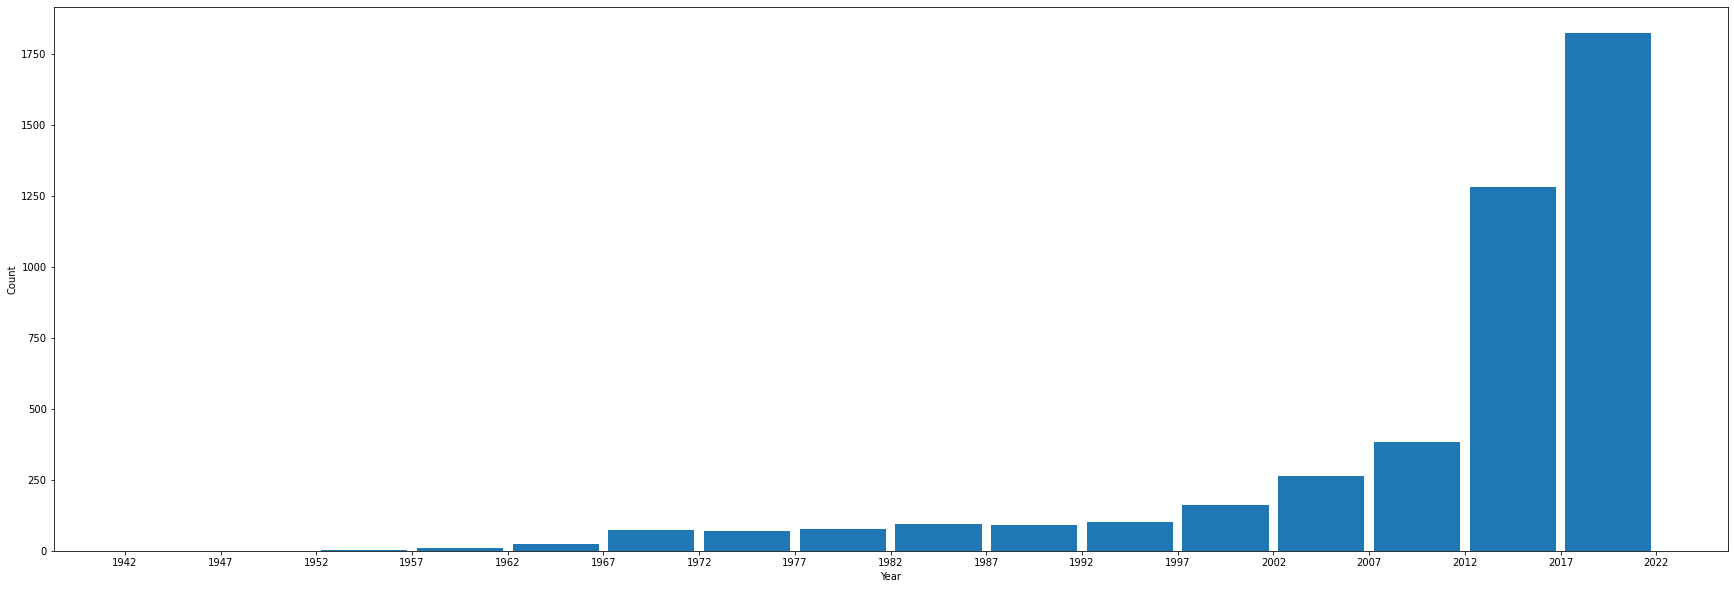

In [24]:
import numpy as np
plt.figure(figsize=(30, 10))
data = df["sp_release_date"]
data = [t.year for t in data]
number = np.arange(min(data), max(data) + 5, 5)
label = map(lambda x: str(x), number)
plt.hist(data, bins=number, rwidth=0.9)
plt.xticks(number, label)
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

In [64]:
first_chunk = df[df["sp_release_date"].apply(lambda x : x.year < 1980)]

In [68]:
second_chunk = df[df["sp_release_date"].apply(lambda x : 1980 <= x.year < 1990)]

In [71]:
third_chunk = df[df["sp_release_date"].apply(lambda x : 1990 <= x.year < 2000)]
len(third_chunk)

222

In [72]:
forth_chunk = df[df["sp_release_date"].apply(lambda x : 2000 <= x.year < 2010)]
len(forth_chunk)

521

In [74]:
forth_chunk = df[df["sp_release_date"].apply(lambda x : 2010 <= x.year < 2015)]
len(forth_chunk)

780

In [75]:
fifth_chunk = df[df["sp_release_date"].apply(lambda x : 2015 <= x.year)]
len(fifth_chunk)

2535